# Importing all the needed libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score


# Showing the dataframe infos

In [13]:
df=pd.read_csv("StudentPerformanceFactors.csv")
print(df.head(10))
print(f"lines number is {df.shape[0]}")
print(f"columns number is {df.shape[1]}")
print(f"data info : {df.info()}")
print(f"data description : {df.describe()}")

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

# Filling missing values and cleaning data

In [14]:
'''before removing null values'''
print(df.isnull().sum())
cleandf=df.dropna()
'''after removing null values'''
print(cleandf.isnull().sum()) 
cleandf.loc[:,'Exam_Score']=cleandf['Exam_Score'].apply(lambda x : 100 if x > 100 else x)
cleandf.loc[:,'Previous_Scores']=cleandf['Previous_Scores'].apply(lambda x : 100 if x > 100 else x)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_

# Visualazing data (Exame Scores)

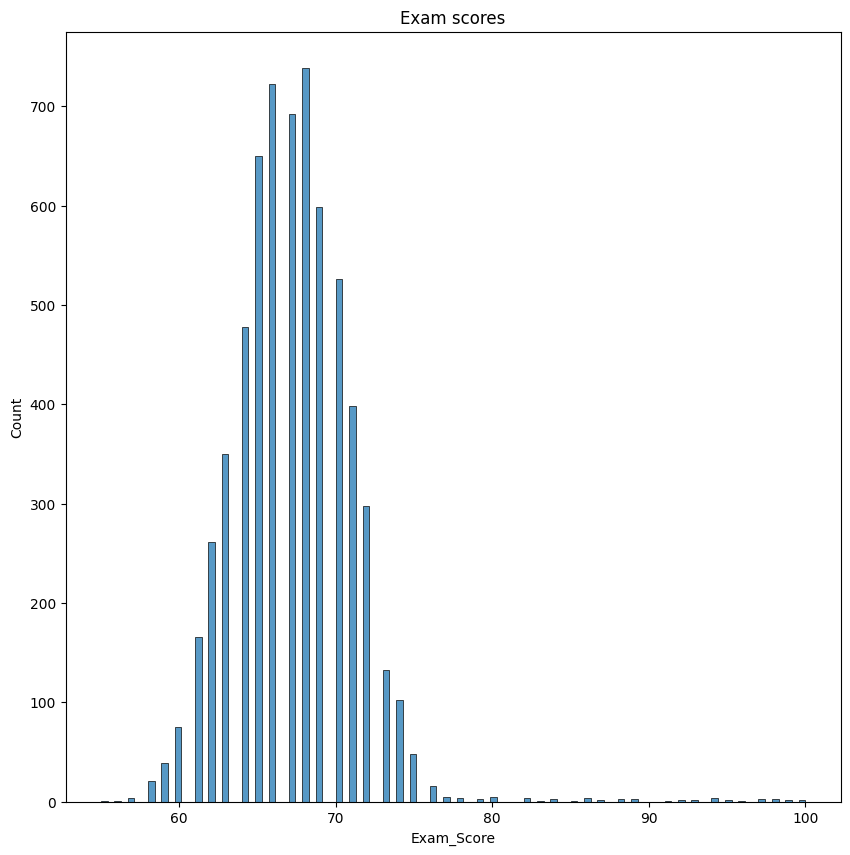

In [15]:
#exam scores histogram
plt.figure(figsize=(10,10))
sns.histplot(x=cleandf["Exam_Score"])
plt.title('Exam scores')
plt.show()



# Replacing categorical values with nemuric values

In [16]:
change_value_1={'high': 300, 'medium': 200, 'low': 100}
change_value_2={'no':0,'yes':100}
change_value_3={'public':0,'private':100}
change_value_4={'negative':-100,'neutral':0,'positive':100}
change_value_5={'high school':0,'college':100,'postgraduate':200}
change_value_6={'near':200,'moderate':100,'far':0}

cleandf.loc[:,'Parental_Involvement'] = cleandf['Parental_Involvement'].str.lower()
cleandf.loc[:,'Parental_Involvement_numeric'] = cleandf['Parental_Involvement'].replace(change_value_1)

cleandf.loc[:,'Access_to_Resources'] = cleandf['Access_to_Resources'].str.lower()
cleandf.loc[:,'Access_to_Resources_numeric'] = cleandf['Access_to_Resources'].replace(change_value_1)

cleandf.loc[:,'Motivation_Level'] = cleandf['Motivation_Level'].str.lower()
cleandf.loc[:,'Motivation_Level_numeric'] = cleandf['Motivation_Level'].replace(change_value_1)

cleandf.loc[:,'Family_Income'] = cleandf['Family_Income'].str.lower()
cleandf.loc[:,'Family_Income_numeric'] = cleandf['Family_Income'].replace(change_value_1)

cleandf.loc[:,'Teacher_Quality'] = cleandf['Family_Income'].str.lower()
cleandf.loc[:,'Teacher_Quality_numeric'] = cleandf['Teacher_Quality'].replace(change_value_1)


cleandf.loc[:,'Extracurricular_Activities'] = cleandf['Extracurricular_Activities'].str.lower()
cleandf.loc[:,'Extracurricular_Activities_numeric'] = cleandf['Extracurricular_Activities'].replace(change_value_2)

cleandf.loc[:,'Internet_Access'] = cleandf['Internet_Access'].str.lower()
cleandf.loc[:,'Internet_Access_numeric'] = cleandf['Internet_Access'].replace(change_value_2)

cleandf.loc[:,'Learning_Disabilities'] = cleandf['Learning_Disabilities'].str.lower()
cleandf.loc[:,'Learning_Disabilities_numeric'] = cleandf['Learning_Disabilities'].replace(change_value_2)

cleandf.loc[:,'School_Type'] = cleandf['School_Type'].str.lower()
cleandf.loc[:,'School_Type_numeric'] = cleandf['School_Type'].replace(change_value_3)

cleandf.loc[:,'Peer_Influence'] = cleandf['Peer_Influence'].str.lower()
cleandf.loc[:,'Peer_Influence_numeric'] = cleandf['Peer_Influence'].replace(change_value_4)

cleandf.loc[:,'Parental_Education_Level'] = cleandf['Parental_Education_Level'].str.lower()
cleandf.loc[:,'Parental_Education_Level_numeric'] = cleandf['Parental_Education_Level'].replace(change_value_5)

cleandf.loc[:,'Distance_from_Home'] = cleandf['Distance_from_Home'].str.lower()
cleandf.loc[:,'Distance_from_Home_numeric'] = cleandf['Distance_from_Home'].replace(change_value_6)
print (cleandf)





      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  low                high   
1                19          64                  low              medium   
2                24          98               medium              medium   
3                29          89                  low              medium   
4                19          92               medium              medium   
...             ...         ...                  ...                 ...   
6602             25          69                 high              medium   
6603             23          76                 high              medium   
6604             20          90               medium                 low   
6605             10          86                 high                high   
6606             15          67               medium                 low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

/tmp/ipykernel_22405/1242994868.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleandf.loc[:,'Parental_Involvement_numeric'] = cleandf['Parental_Involvement'].replace(change_value_1)
/tmp/ipykernel_22405/1242994868.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.loc[:,'Parental_Involvement_numeric'] = cleandf['Parental_Involvement'].replace(change_value_1)
/tmp/ipykernel_22405/1242994868.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

# Visualizing relations between dataframe columns

/tmp/ipykernel_22405/1072319722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.loc[:,'newc']=cleandf['Hours_Studied']*cleandf['Attendance']


<Axes: >

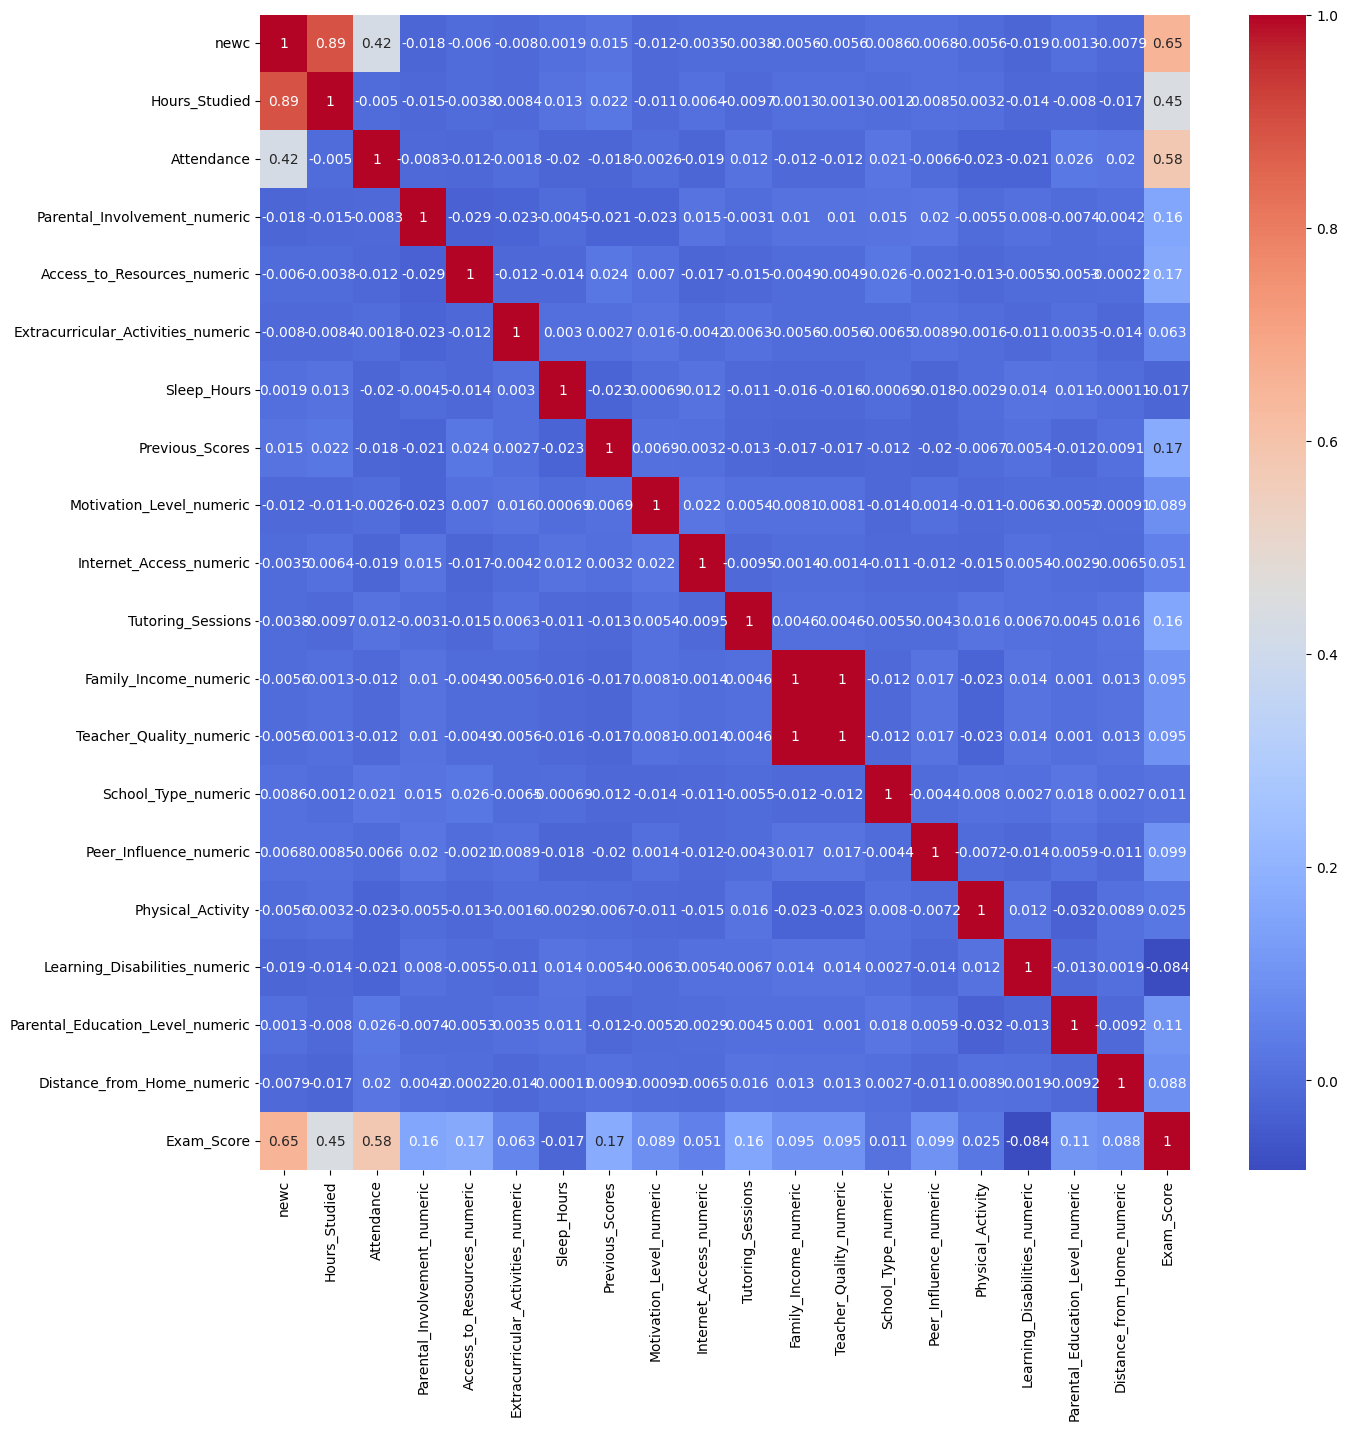

In [ ]:
cleandf.loc[:,'Hours_Studied_Attendance']=cleandf['Hours_Studied']*cleandf['Attendance']
numeric_cols=['Hours_Studied_Attendance','Hours_Studied','Attendance','Parental_Involvement_numeric','Access_to_Resources_numeric','Extracurricular_Activities_numeric','Sleep_Hours','Previous_Scores','Motivation_Level_numeric','Internet_Access_numeric','Tutoring_Sessions','Family_Income_numeric','Teacher_Quality_numeric','School_Type_numeric','Peer_Influence_numeric','Physical_Activity','Learning_Disabilities_numeric','Parental_Education_Level_numeric','Distance_from_Home_numeric']
subset_corr = cleandf[numeric_cols+['Exam_Score']].corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(subset_corr, annot=True, cmap="coolwarm")

# training the model

In [33]:
X=cleandf[numeric_cols]
Y=cleandf['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}



xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
y_pred_xgb = grid_search.predict(X_test)


r2 = r2_score(y_test, y_pred_xgb)
r2

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


0.7023501396179199